<a href="https://colab.research.google.com/github/KurtKalwin/Stock-prediction/blob/master/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
df = web.DataReader('AAPL',data_source='yahoo',start='2014-01-01',end='2020-01-01')

In [6]:
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,70.747330
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,69.193306
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,69.570625
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,69.073074
2014-01-08,77.937141,76.955711,76.972855,77.637146,64632400.0,69.510536
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,282.831299
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,288.442780
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,288.333313


In [8]:
df.shape

(1510, 6)

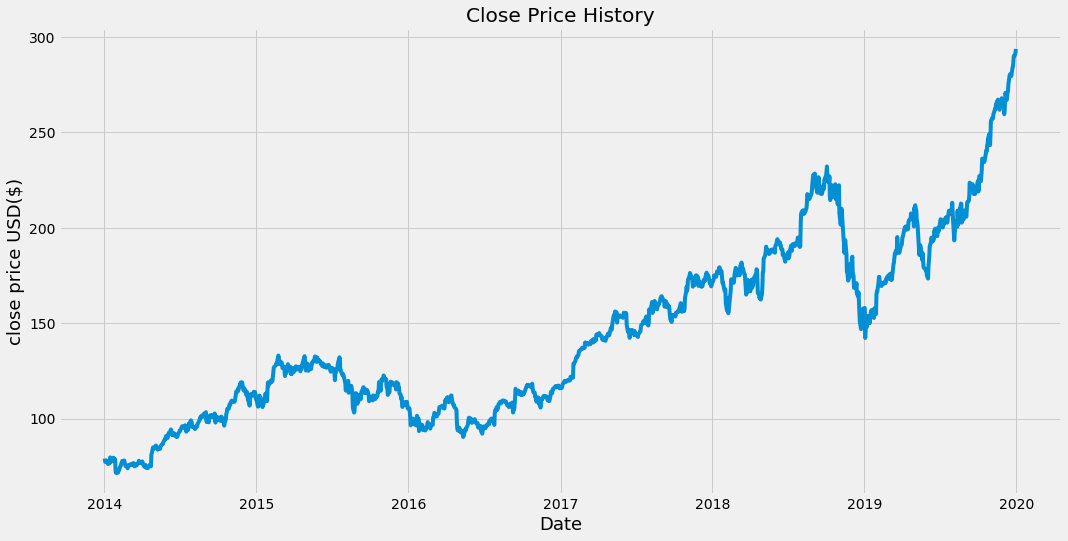

In [11]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD($)', fontsize=18)
plt.show()

In [12]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset)* .8)

training_data_len 


1208

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03429171],
       [0.02648209],
       [0.02837824],
       ...,
       [0.98267736],
       [0.9904163 ],
       [1.        ]])

In [15]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.03429171, 0.02648209, 0.02837824, 0.02587789, 0.02807615,
       0.02361532, 0.02131421, 0.02310755, 0.02995947, 0.03701062,
       0.03501162, 0.02628282, 0.03168206, 0.03325041, 0.03625215,
       0.02975378, 0.03260125, 0.0043194 , 0.00062349, 0.        ,
       0.00052707, 0.00112484, 0.00579137, 0.00823387, 0.00818245,
       0.01279109, 0.01877528, 0.02325537, 0.02322965, 0.02869961,
       0.02841682, 0.02970235, 0.02416168, 0.02016366, 0.01637132,
       0.0178497 , 0.0143209 , 0.01129345, 0.01792684, 0.01700765,
       0.01798468, 0.0202215 , 0.02094142, 0.01990654, 0.01970731,
       0.02001581, 0.02333892, 0.02367317, 0.01984228, 0.01601136,
       0.01732906, 0.02032434, 0.02023437, 0.01858888, 0.02126921,
       0.02533153, 0.02905957, 0.02571075, 0.02421952, 0.02383385])]
[0.023756719874130527]

[array([0.03429171, 0.02648209, 0.02837824, 0.02587789, 0.02807615,
       0.02361532, 0.02131421, 0.02310755, 0.02995947, 0.03701062,
       0.03501162, 0.02628282, 0.0

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1148, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1148/1148 [==============================] - 43s 38ms/step - loss: 0.0013


In [0]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [49]:
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

2.094358835788752

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


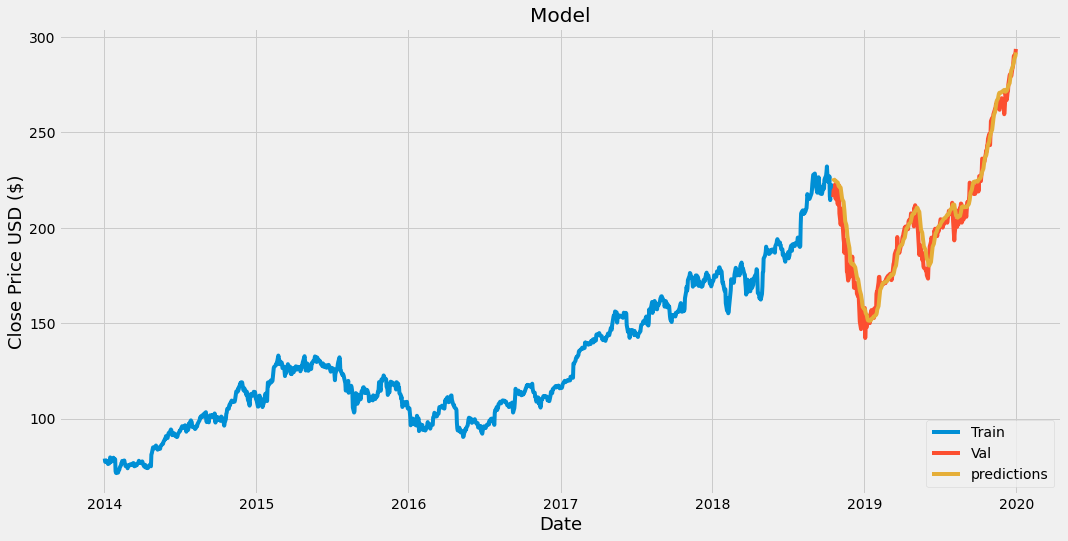

In [54]:
train = data[:training_data_len]
vaild = data[training_data_len :]
vaild['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title ('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(vaild[['Close', 'predictions']])
plt.legend(['Train','Val','predictions'], loc= 'lower right')
plt.show()

In [55]:
vaild

,Close,predictions
Date,,
2018-10-18,216.020004,225.911911
2018-10-19,219.309998,225.217148
2018-10-22,220.649994,224.730652
2018-10-23,222.729996,224.504501
2018-10-24,215.089996,224.630005
...,...,...
2019-12-24,284.269989,285.162903
2019-12-26,289.910004,286.523499
2019-12-27,289.799988,288.274780


In [68]:
apple_quote = web.DataReader('APPL', data_source='yahoo', start ='2014-01-01', end ='2020-12-17')
new_df = apple_quote.filter(['Close'])
pastdays = new_df[-60:].values
pastdays_scaled = scaler.transform(pastdays)
x_test = []
x_test.append(pastdays_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test[1],1))
estimated_price = model.predict(x_test)
estimated_price = scaler.inverse_transform(estimated_price)
print(estimated_price)

KeyError: ignored